code from: https://machinelearningmastery.com/arima-for-time-zill-forecasting-with-python/



In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
zill = pd.read_csv('https://mod4finalproject.s3.amazonaws.com/zillow_cleaned_no_nulls.csv', 
                   index_col=0, 
                   dtype = {'zip':'object'})

In [ ]:
zill = zill.drop(columns = ['regionid', 'city', 'state', 'metro', 'countyname', 'sizerank'])

In [ ]:
zill.index = pd.to_datetime(zill.index)

In [ ]:
best_zips = ['90210', '33480', '01001']

In [ ]:
# zill = zill.resample('M', convention='start').sum()

# Model for all data

In [ ]:
# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')
 
model = ARIMA(np.asarray(zill.value.values), order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Model for zip 1

In [29]:
zip1 = zill.loc[(zill.zip == best_zips[0])]

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2674.640
Method:                       css-mle   S.D. of innovations           5934.479
Date:                Wed, 06 May 2020   AIC                           5361.281
Time:                        15:30:31   BIC                           5382.737
Sample:                             1   HQIC                          5369.903
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8652.6882   8442.168      1.025      0.305   -7893.657    2.52e+04
ar.L1.D.y      0.3722      0.062      5.958      0.000       0.250       0.495
ar.L2.D.y      0.4198      0.063      6.651      0.0

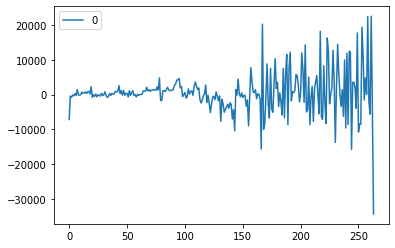

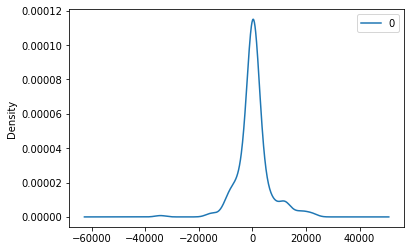

                  0
count    264.000000
mean     519.847125
std     5967.442293
min   -34273.112799
25%    -1427.869144
50%      209.055392
75%     1691.193294
max    22511.743593


In [32]:
# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')
 
model = ARIMA(np.asarray(zip1.value.values), order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Rolling forecast ARIMA model 

In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')

X = zip1.value.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f, difference=%f' % (yhat, obs, yhat-obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()